In [17]:
import sys
import os
import numpy as np
from mxnet import nd, autograd as ag, gluon
from dataloader import DataLoader

# Data

In [18]:
dl = DataLoader(os.environ["HOME"] + '/.datasets/Han.Xiao/fashion-mnist/')
train_img,train_labels = dl.get_data(kind='train')
test_img,test_labels = dl.get_data(kind='t10k')

train_img_nd = nd.array(train_img).astype(np.float32)/255
train_lab_nd = nd.array(train_labels).astype(np.float32)
test_img_nd = nd.array(test_img).astype(np.float32)/255
test_lab_nd = nd.array(test_labels).astype(np.float32)

def data_iter(batch_size=100, kind='train'):
    if kind != 'train':
        idx = list(range(len(test_labels)))
        for i in range(0,len(test_labels), batch_size):
            j = nd.array(idx[i:min(i+batch_size,len(test_labels))])
            yield nd.take(test_img_nd,j), nd.take(test_lab_nd,j)
    else:
        idx = list(range(len(train_labels)))
        for i in range(0,len(train_labels), batch_size):
            j = nd.array(idx[i:min(i+batch_size,len(train_labels))])
            yield nd.take(train_img_nd,j), nd.take(train_lab_nd,j)

# Model

In [19]:
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Dense(256, activation="relu"))
    net.add(gluon.nn.Dense(10))

net.initialize()
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})

# Train

In [22]:
def accuracy(yhat,y):
    return nd.mean(yhat.argmax(axis=1)==y).asscalar()

In [25]:
batch_size = 100
epochs = 100

for epoch in range(epochs):
    train_loss = 0.
    train_accu = 0.
    for data, label in data_iter(batch_size=batch_size):
        with ag.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        trainer.step(batch_size)

        train_loss += nd.mean(loss).asscalar()
        train_accu += accuracy(output,label)

    print("epoch:%d; loss:%f; accu:%f" % (epoch, 
                    train_loss/len(train_labels)*batch_size,
                    train_accu/len(train_labels)*batch_size))

epoch:0; loss:0.421329; accu:0.843017
epoch:1; loss:0.374834; accu:0.860417
epoch:2; loss:0.345053; accu:0.871883
epoch:3; loss:0.325451; accu:0.879083
epoch:4; loss:0.309069; accu:0.885450
epoch:5; loss:0.294542; accu:0.890000
epoch:6; loss:0.281466; accu:0.895183
epoch:7; loss:0.271300; accu:0.898667
epoch:8; loss:0.261925; accu:0.902183
epoch:9; loss:0.252111; accu:0.905483
epoch:10; loss:0.244033; accu:0.908867
epoch:11; loss:0.236035; accu:0.911250
epoch:12; loss:0.229146; accu:0.913800
epoch:13; loss:0.222106; accu:0.917300
epoch:14; loss:0.215534; accu:0.918800
epoch:15; loss:0.209568; accu:0.921783
epoch:16; loss:0.203648; accu:0.923533
epoch:17; loss:0.198840; accu:0.926800
epoch:18; loss:0.192500; accu:0.928250
epoch:19; loss:0.186378; accu:0.930533
epoch:20; loss:0.181336; accu:0.933350
epoch:21; loss:0.177001; accu:0.934233
epoch:22; loss:0.173504; accu:0.936033
epoch:23; loss:0.168271; accu:0.938017
epoch:24; loss:0.163900; accu:0.939500
epoch:25; loss:0.159988; accu:0.941

# Test

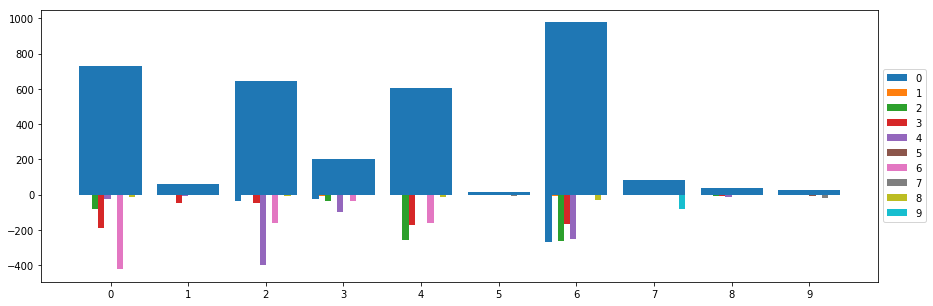

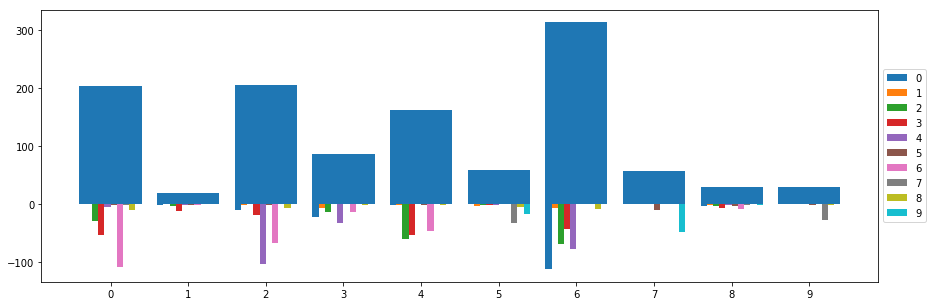

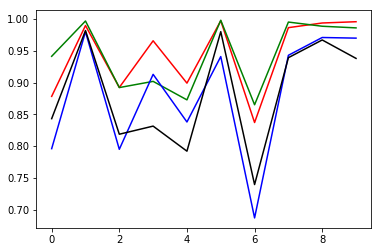

In [28]:
from matplotlib import pyplot as plt
from statiser import Statistics
train_statistics = Statistics(net(train_img_nd).argmax(axis=1).asnumpy(), 
                              train_lab_nd.asnumpy())
test_statistics = Statistics(net(test_img_nd).argmax(axis=1).asnumpy(), 
                             test_lab_nd.asnumpy())
train_statistics.show()
test_statistics.show()
plt.plot(range(10),train_statistics.Recall(),'r')
plt.plot(range(10),train_statistics.Precision(),'g')
plt.plot(range(10),test_statistics.Recall(),'b')
plt.plot(range(10),test_statistics.Precision(),'k')
plt.show()